In [1]:
import pandas as pd

df = pd.read_csv('/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/cleaned.csv')

In [2]:
df['Borough'].value_counts()

brooklyn         71363
queens           52037
bronx            49869
manhattan        46485
staten island    10012
Name: Borough, dtype: int64

In [3]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Incident Address', 'Address Type',
       'City', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'Open Data Channel Type', 'Park Facility Name', 'Latitude',
       'Longitude', 'Police Precincts', 'duration', 'duration_seconds',
       'duration_hours', 'duration_days', 'day_of_week', 'day_type',
       'housing_units', 'occupied_housing_units', 'median_home_value',
       'population', 'median_household_income', 'population_density'],
      dtype='object')

In [4]:
# Get the top 20 'Complaint Type' for each 'Borough'
borough_complaint_counts = df.groupby(['Borough', 'Complaint Type']).size().reset_index(name='Count')
for borough in borough_complaint_counts['Borough'].unique():
    top_20 = borough_complaint_counts[borough_complaint_counts['Borough'] == borough].nlargest(20, 'Count')
    print('Top 20 Complaint Types in', borough)
    print(top_20)
    print('\n')

Top 20 Complaint Types in bronx
    Borough          Complaint Type  Count
47    bronx          heat/hot water  11729
68    bronx                   noise   7653
52    bronx         illegal parking   6144
103   bronx    unsanitary condition   2947
11    bronx        blocked driveway   2113
77    bronx                plumbing   2000
75    bronx           paint/plaster   1734
27    bronx             door/window   1327
109   bronx              water leak   1085
1     bronx       abandoned vehicle    867
25    bronx       derelict vehicles    864
32    bronx                electric    749
42    bronx                 general    736
93    bronx  street light condition    731
37    bronx         flooring/stairs    699
6     bronx               appliance    627
92    bronx        street condition    537
34    bronx                elevator    513
26    bronx         dirty condition    497
80    bronx                  rodent    482


Top 20 Complaint Types in brooklyn
      Borough               

Visualize Top 20 Complaints Per Bourough and Perform Test to See if There is Significant

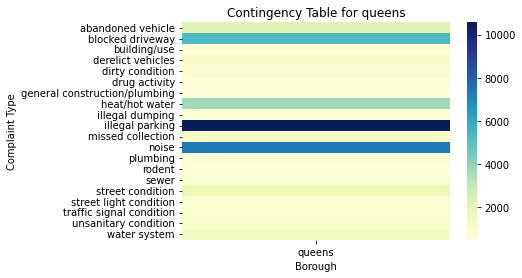

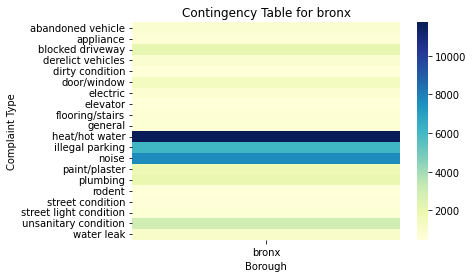

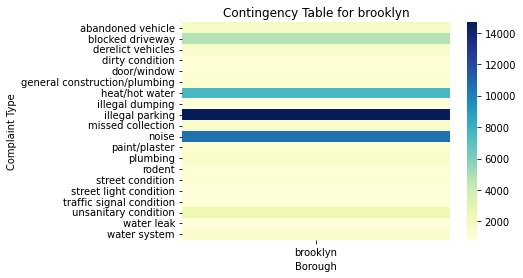

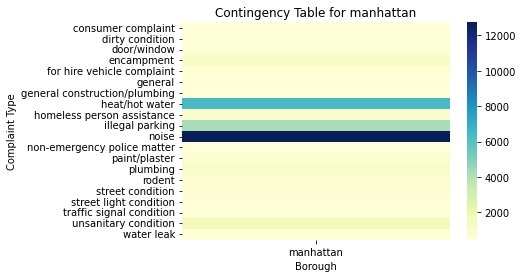

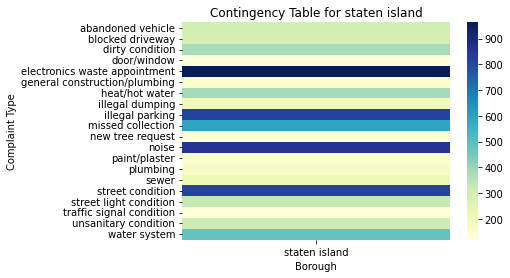

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

boroughs = df['Borough'].unique()

# Get the top 20 complaint types for each borough
top_20_complaints = {}
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    complaint_counts = borough_df['Complaint Type'].value_counts()
    top_20 = complaint_counts.nlargest(20).index.tolist()
    top_20_complaints[borough] = top_20

# Create a contingency table for each borough and top 20 complaint type:
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    top_20 = top_20_complaints[borough]
    borough_df = borough_df[borough_df['Complaint Type'].isin(top_20)]
    contingency_table = pd.crosstab(borough_df['Complaint Type'], borough_df['Borough'])
    
    # Visualize the contingency table as a heatmap:
    sns.heatmap(contingency_table, cmap="YlGnBu")
    plt.title(f'Contingency Table for {borough}')
    plt.xlabel('Borough')
    plt.ylabel('Complaint Type')
    plt.show()

# # Create an empty dictionary to store the complaint types for each borough
# complaints = {}

# # Loop over each borough and add the top 20 complaint types to the dictionary
# for b in boroughs:
#     top_20 = top_20_complaints[b]
#     complaints[b] = df.loc[(df['Borough'] == b) & df['Complaint Type'].isin(top_20), 'Complaint Type'].values

# # Perform the Kruskal-Wallis test on the top 20 complaint types for each borough
# p_values = {}
# for i, b1 in enumerate(boroughs):
#     for j, b2 in enumerate(boroughs):
#         if j > i:
#             top_20_b1 = top_20_complaints[b1]
#             top_20_b2 = top_20_complaints[b2]
#             common_complaints = list(set(top_20_b1).intersection(top_20_b2))
#             if len(common_complaints) > 0:
#                 b1_complaints = df.loc[(df['Borough'] == b1) & df['Complaint Type'].isin(common_complaints), 'Complaint Type'].values
#                 b2_complaints = df.loc[(df['Borough'] == b2) & df['Complaint Type'].isin(common_complaints), 'Complaint Type'].values
#                 stat, p = kruskal(b1_complaints, b2_complaints)
#                 p_values[(b1, b2)] = p

# # Print the p-values for each borough comparison
# for k, v in p_values.items():
#     print(f"p-value for {k[0]} vs {k[1]}: {v}")

In [6]:
# from scipy.stats import chi2_contingency

# # Get the top 20 complaints
# top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# # Create a contingency table with the top 20 complaints on the left and boroughs as columns
# contingency_table = pd.crosstab(df[df['Complaint Type'].isin(top_20_complaints)]['Complaint Type'],
#                                 df[df['Complaint Type'].isin(top_20_complaints)]['Borough'])

# # Add a row for "Other" complaints
# other_complaints = df[~df['Complaint Type'].isin(top_20_complaints)]
# other_complaints_by_borough = pd.crosstab(other_complaints['Complaint Type'], other_complaints['Borough']).sum()
# other_complaints_total = other_complaints_by_borough.sum()
# other_complaints_by_borough['Total'] = other_complaints_total
# contingency_table.loc['other'] = other_complaints_by_borough

# # Add a total column to the contingency table
# contingency_table['Total'] = contingency_table.sum(axis=1)

# # Sort the contingency table by the total count of each complaint
# contingency_table = contingency_table.loc[contingency_table['Total'].sort_values(ascending=False).index]

# contingency_table

Borough,bronx,brooklyn,manhattan,queens,staten island,Total
Complaint Type,,,,,,
other,7344,13134,12488,10731,3244,46941
noise,7653,10571,12737,7372,856,39189
illegal parking,6144,14662,4182,10569,815,36372
heat/hot water,11729,7544,6366,3687,381,29707
blocked driveway,2113,4735,355,5286,287,12776
unsanitary condition,2947,2474,1680,994,311,8406
plumbing,2000,1563,1113,664,167,5507
abandoned vehicle,867,1792,201,2183,298,5341
street condition,537,1186,785,1621,819,4948


Chi-Sqaured test for Contintency:

The null hypothesis for the chi-squared test performed on the contingency table is that there is no association between the Complaint Type and Borough variables in the population. In other words, the observed frequencies in the contingency table are equal to what would be expected by chance alone, given the marginal totals.

The alternative hypothesis is that there is a statistically significant association between the Complaint Type and Borough variables in the population. In other words, the observed frequencies in the contingency table are not equal to what would be expected by chance alone, given the marginal totals, and there is a relationship between the two variables.

In [7]:
# # Perform the chi-squared test for the contingency table
# chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1,:-1])

# # Print the result
# print(f'Chi-squared statistic: {chi2:.2f}, p-value: {p:.2e}\n')

Chi-squared statistic: 34175.24, p-value: 0.00e+00



Null hypothesis: The distribution of complaint types across boroughs is the same.

Alternative hypothesis: The distribution of complaint types across boroughs is not the same.

In [8]:
# from scipy.stats import kruskal

# # create a list of data frames, one for each borough
# borough_dfs = [df[df['Borough'] == b] for b in df['Borough'].unique()]

# # create a dictionary to store the complaint types for each borough
# complaint_types_by_borough = {}

# # populate the dictionary with the complaint types for each borough
# for df_borough in borough_dfs:
#     borough_name = df_borough['Borough'].iloc[0]
#     complaint_types = df_borough['Complaint Type'].unique()
#     complaint_types_by_borough[borough_name] = complaint_types

# # perform the Kruskal-Wallis test for each combination of boroughs
# n_tests = len(complaint_types_by_borough) * (len(complaint_types_by_borough) - 1) // 2
# alpha = 0.05 / n_tests
# for borough1 in complaint_types_by_borough.keys():
#     for borough2 in complaint_types_by_borough.keys():
#         if borough1 != borough2:
#             print(f'Kruskal-Wallis test for {borough1} vs {borough2}:')
#             data1 = df[df['Borough'] == borough1]['Complaint Type']
#             data2 = df[df['Borough'] == borough2]['Complaint Type']
#             h, p = kruskal(data1, data2)
#             if p < alpha:
#                 print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (significant)\n')
#             else:
#                 print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (not significant)\n')

Kruskal-Wallis test for queens vs bronx:
H-statistic: 89.51, p-value: 3.05e-21 (significant)

Kruskal-Wallis test for queens vs brooklyn:
H-statistic: 100.88, p-value: 9.77e-24 (significant)

Kruskal-Wallis test for queens vs manhattan:
H-statistic: 1097.64, p-value: 1.07e-240 (significant)

Kruskal-Wallis test for queens vs staten island:
H-statistic: 331.04, p-value: 5.71e-74 (significant)

Kruskal-Wallis test for bronx vs queens:
H-statistic: 89.51, p-value: 3.05e-21 (significant)

Kruskal-Wallis test for bronx vs brooklyn:
H-statistic: 0.66, p-value: 4.16e-01 (not significant)

Kruskal-Wallis test for bronx vs manhattan:
H-statistic: 482.94, p-value: 4.89e-107 (significant)

Kruskal-Wallis test for bronx vs staten island:
H-statistic: 85.21, p-value: 2.68e-20 (significant)

Kruskal-Wallis test for brooklyn vs queens:
H-statistic: 100.88, p-value: 9.77e-24 (significant)

Kruskal-Wallis test for brooklyn vs bronx:
H-statistic: 0.66, p-value: 4.16e-01 (not significant)

Kruskal-Wallis

The null hypothesis for the chi-squared test is that there is no association between the complaint type and the borough, meaning that the observed frequencies in the contingency table are not significantly different from what would be expected by chance. 

The alternative hypothesis is that there is a significant association between the complaint type and the borough, meaning that the observed frequencies in the contingency table are significantly different from what would be expected by chance.

In [13]:
# from scipy.stats import chi2_contingency

# # Get the top 20 complaints
# top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# # Create a dictionary to store the results
# results = {}

# # Loop through each complaint type and perform the chi-squared test
# for complaint_type in top_20_complaints:
#     # Create a contingency table for the complaint type
#     contingency_table = pd.crosstab(df[df['Complaint Type'] == complaint_type]['Borough'],
#                                     df[df['Complaint Type'] == complaint_type]['Complaint Type'])
    
#     # Calculate the count of "Other" complaints for each borough
#     other_complaints_by_borough = df[~df['Complaint Type'].isin([complaint_type])]['Borough'].value_counts()

#     # Add a row for "Other" complaints
#     other_complaints_total = other_complaints_by_borough.sum()
#     other_complaints_by_borough['other'] = other_complaints_total
#     contingency_table['other'] = other_complaints_by_borough
    
#     # Perform the chi-squared test
#     chi2, p, dof, expected = chi2_contingency(contingency_table)

#     # Store the results in the dictionary
#     results[complaint_type] = {'Chi-squared statistic': chi2, 'p-value': p}

# # Print the results
# for complaint_type, result in results.items():
#     print(f"Chi-squared test for {complaint_type}:")
#     print(f"Chi-squared statistic: {result['Chi-squared statistic']:.2f}")
#     print(f"p-value: {result['p-value']:.2e}\n")


In [10]:
# import folium
# from folium.plugins import HeatMap

# # Get the top 20 complaints
# top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# # create a new dataframe with the frequency of complaints by borough for the top 20 complaints
# df_heatmap = df[df['Complaint Type'].isin(top_20_complaints)].groupby(['Borough', 'Complaint Type']).size().reset_index(name='Frequency')

# # create a pivot table with the frequency of complaints for each borough and complaint type
# heatmap_data = pd.pivot_table(df_heatmap, values='Frequency', index=['Borough'], columns=['Complaint Type'])

# # create a list of colors for the heatmap
# colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']

# # create a folium map centered on New York City
# map_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# # create a heatmap layer for each complaint type
# for i, c in enumerate(heatmap_data.columns):
#     # sample the data to reduce the number of points on the map
#     sample_size = int(len(df[df['Complaint Type'] == c]) * 0.01)
#     df_sample = df[df['Complaint Type'] == c].sample(n=sample_size)
#     heatmap_layer = HeatMap(list(zip(df_sample['Latitude'], df_sample['Longitude'])),
#                             name=c,
#                             min_opacity=0.5,
#                             max_zoom=18,
#                             radius=15,
#                             blur=10,
#                             gradient={0.4: colors[i%len(colors)-1], 0.65: colors[i%len(colors)-2], 1: colors[i%len(colors)-3]}
#                            )
#     heatmap_layer.add_to(map_heatmap)

# # add a layer control to toggle between the different complaint types
# folium.LayerControl().add_to(map_heatmap)

# # save the map as an HTML file
# map_heatmap.save('heatmap.html')

In [11]:
# import folium
# from folium.plugins import MarkerCluster

# # Get the top 20 complaints
# top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# # Create a new dataframe with only the top 20 complaints
# df_top_20_complaints = df[df['Complaint Type'].isin(top_20_complaints)]

# # Create a folium map centered on New York City
# map_complaints = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# # Create a MarkerCluster layer for each complaint type
# for c in top_20_complaints:
#     # Filter the dataframe to only include the current complaint type
#     df_complaint = df_top_20_complaints[df_top_20_complaints['Complaint Type'] == c]
    
#     # Create a MarkerCluster layer for the current complaint type
#     mc = MarkerCluster(name=c)
    
#     # Add a marker to the MarkerCluster layer for each complaint location
#     for lat, lon, address in zip(df_complaint['Latitude'], df_complaint['Longitude'], df_complaint['Incident Address']):
#         folium.Marker(location=[lat, lon], tooltip=address).add_to(mc)
    
#     # Add the MarkerCluster layer to the map
#     mc.add_to(map_complaints)

# # Add a layer control to toggle between the different complaint types
# folium.LayerControl().add_to(map_complaints)

# # Display the map
# map_complaints.save("top20_complaints_map.html")

In [12]:
df.dtypes

Created Date                       object
Closed Date                        object
Agency                             object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Address Type                       object
City                               object
Resolution Description             object
Resolution Action Updated Date     object
Borough                            object
Open Data Channel Type             object
Park Facility Name                 object
Latitude                          float64
Longitude                         float64
Police Precincts                  float64
duration                           object
duration_seconds                  float64
duration_hours                    float64
duration_days                     float64
day_of_week                         int64
day_type                          

The null hypothesis of the Kruskal-Wallis test is that the population medians of all groups are equal. The alternative hypothesis is that at least one group has a different population median from the others.

In this specific test, the Kruskal-Wallis test is being used to compare demographic variables (housing units, occupied housing units, median home value, population, median household income, population density) across different boroughs. Therefore, the null hypothesis is that the population medians of each demographic variable are equal across all boroughs, while the alternative hypothesis is that at least one borough has a different population median for a specific demographic variable.

In [12]:
# from scipy.stats import kruskal

# # select the demographic variables and borough columns
# demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# # drop any rows with missing values
# demographics = demographics.dropna()

# # group the data by borough
# groups = demographics.groupby('Borough')

# # conduct a Kruskal-Wallis test for each demographic variable
# for var in demographics.columns[:-1]:  # exclude the last column (Borough)
#     stat, pvalue = kruskal(*[group[var].values for name, group in groups])
#     print(f'{var} - Kruskal-Wallis test statistic: {stat:.2f}, p-value: {pvalue:.4f}')

The Mann-Whitney U test is a non-parametric test used to determine whether two independent samples were drawn from populations with the same distribution. The null hypothesis is that the two populations are equal, while the alternative hypothesis is that they are not equal. In this code, the test is being conducted for each demographic variable between each pair of boroughs, so the null hypothesis for each test is that the two boroughs have equal values for that demographic variable, while the alternative hypothesis is that they have different values.

In [11]:
# from scipy.stats import mannwhitneyu

# # select the demographic variables and borough columns
# demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# # drop any rows with missing values
# demographics = demographics.dropna()

# # create a list of unique boroughs
# boroughs = demographics['Borough'].unique()

# # conduct pairwise Mann-Whitney U tests for each demographic variable
# for var in demographics.columns[:-1]:  # exclude the last column (Borough)
#     print(f'{var}:')
#     for i in range(len(boroughs)):
#         for j in range(i+1, len(boroughs)):
#             borough1 = boroughs[i]
#             borough2 = boroughs[j]
#             group1 = demographics[demographics['Borough'] == borough1][var]
#             group2 = demographics[demographics['Borough'] == borough2][var]
#             stat, pvalue = mannwhitneyu(group1, group2)
#             print(f'{borough1} vs {borough2} - Mann-Whitney U test statistic: {stat:.2f}, p-value: {pvalue:.4f}')


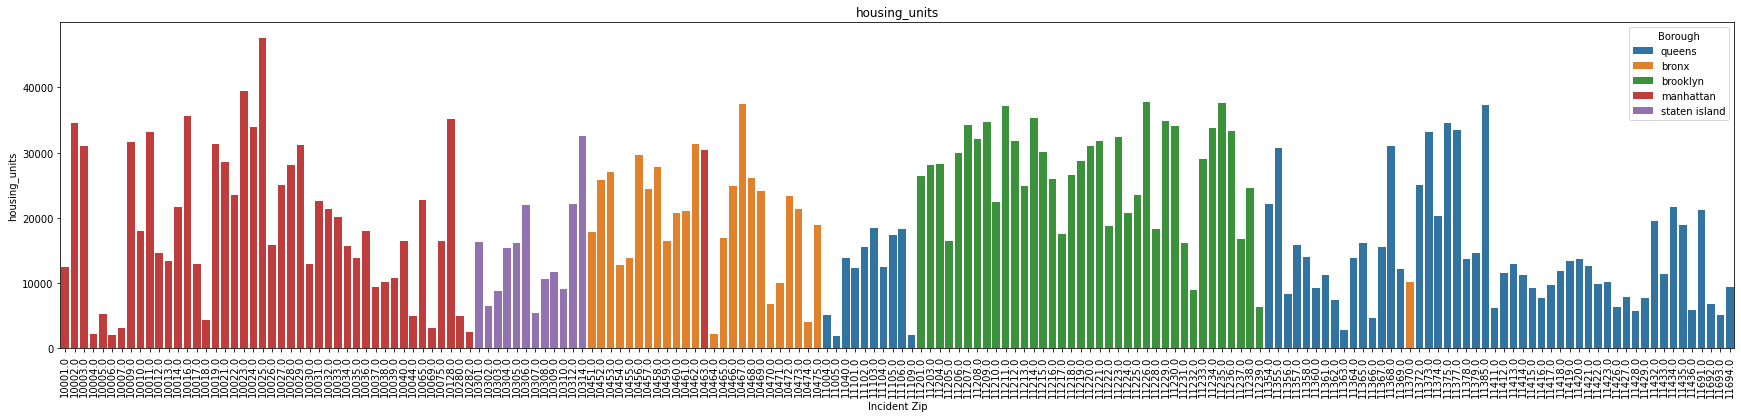

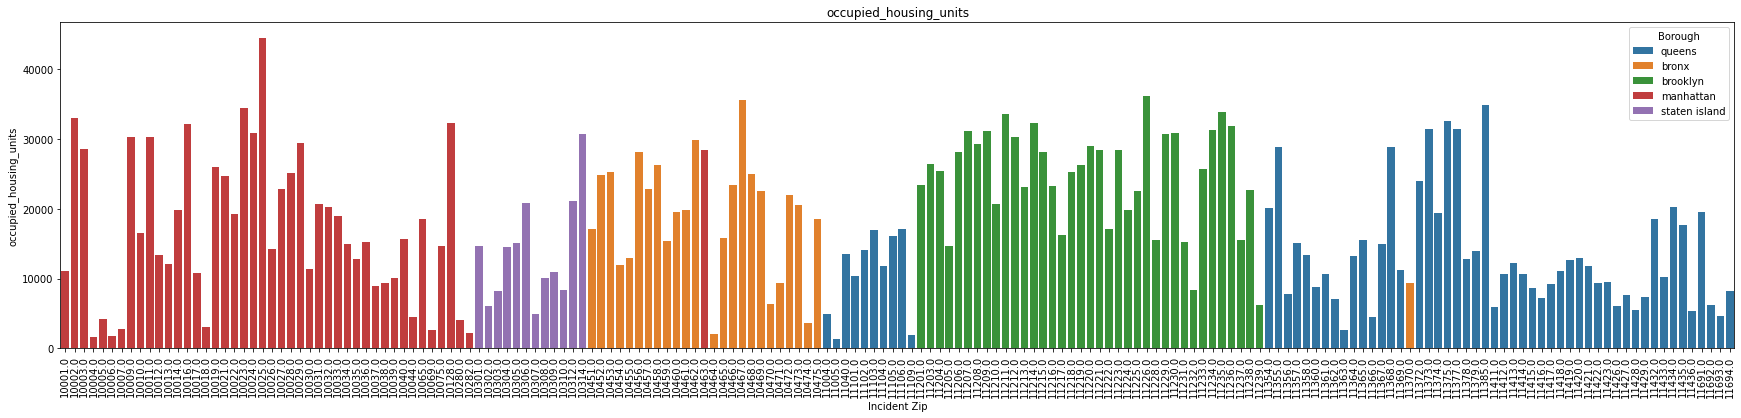

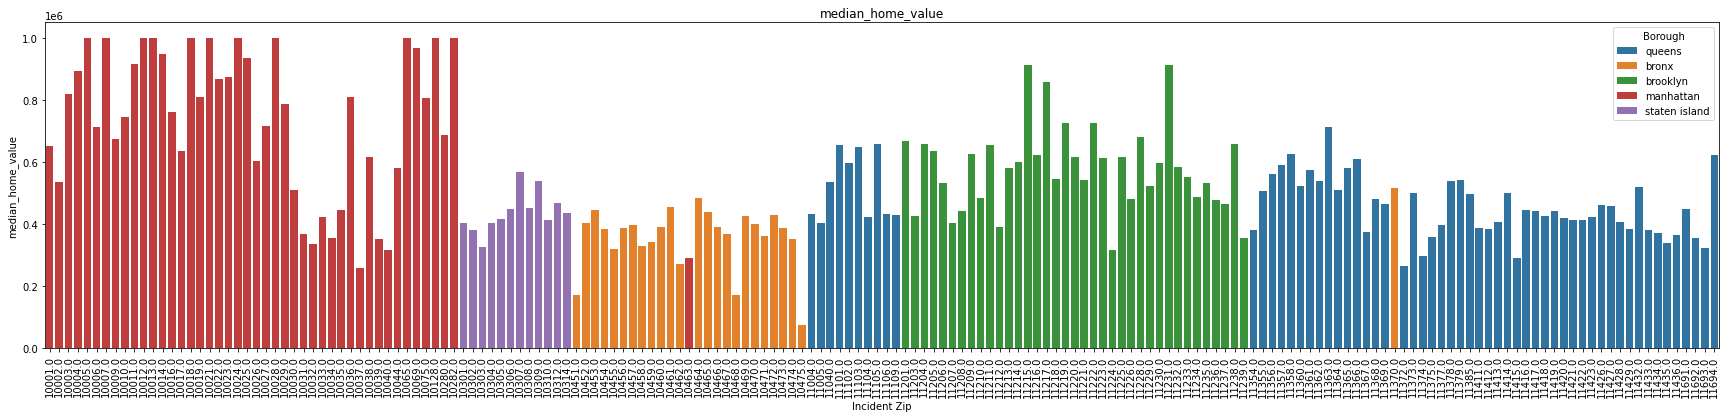

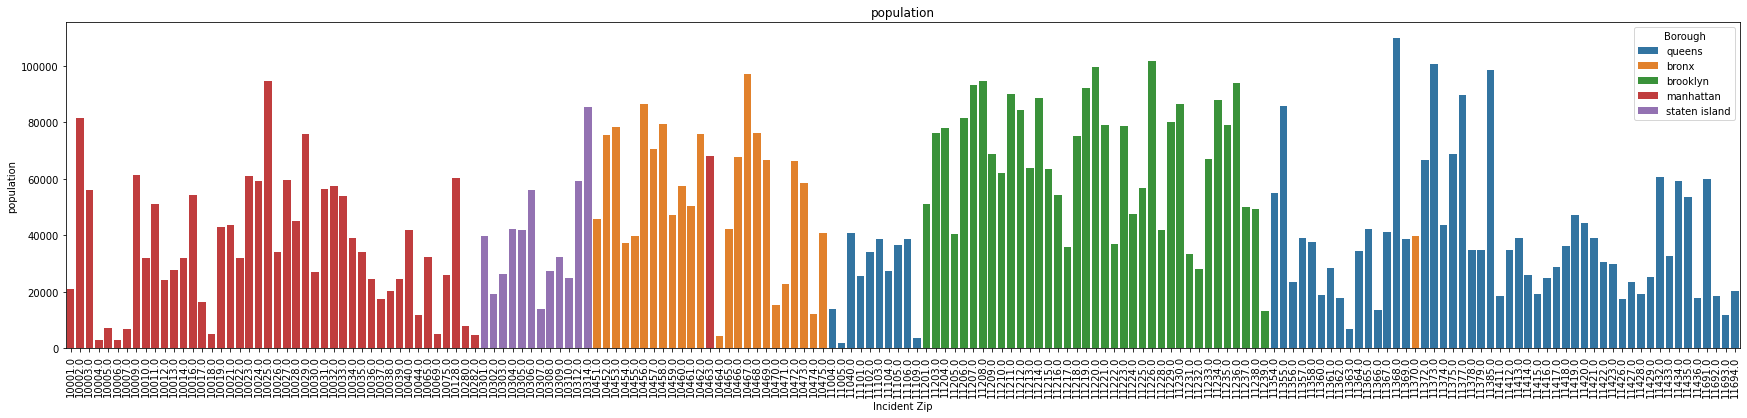

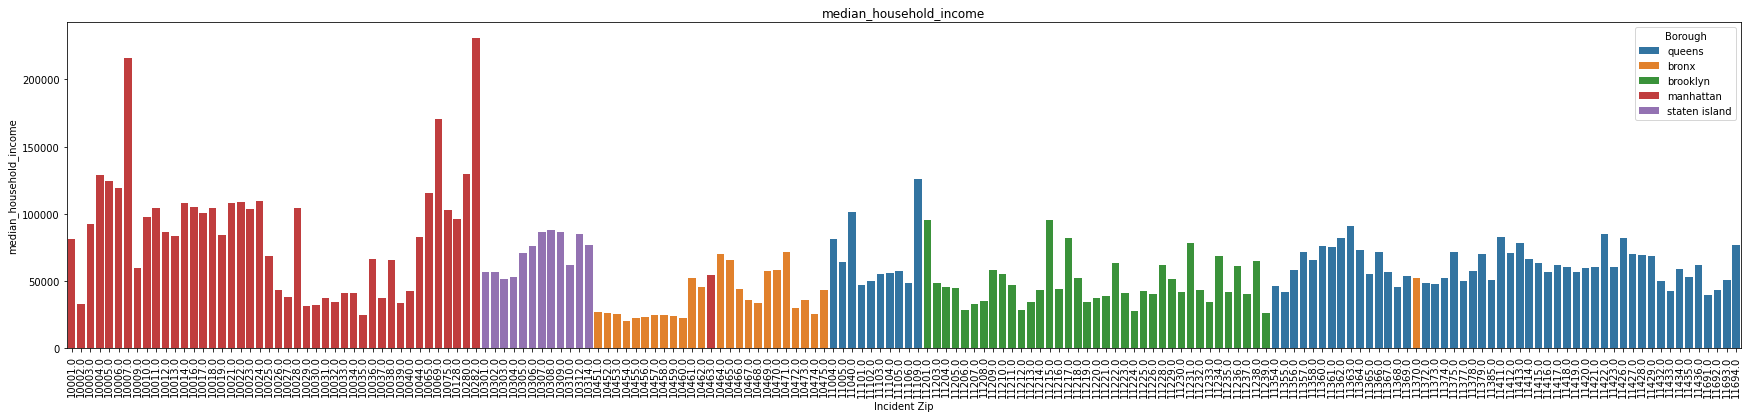

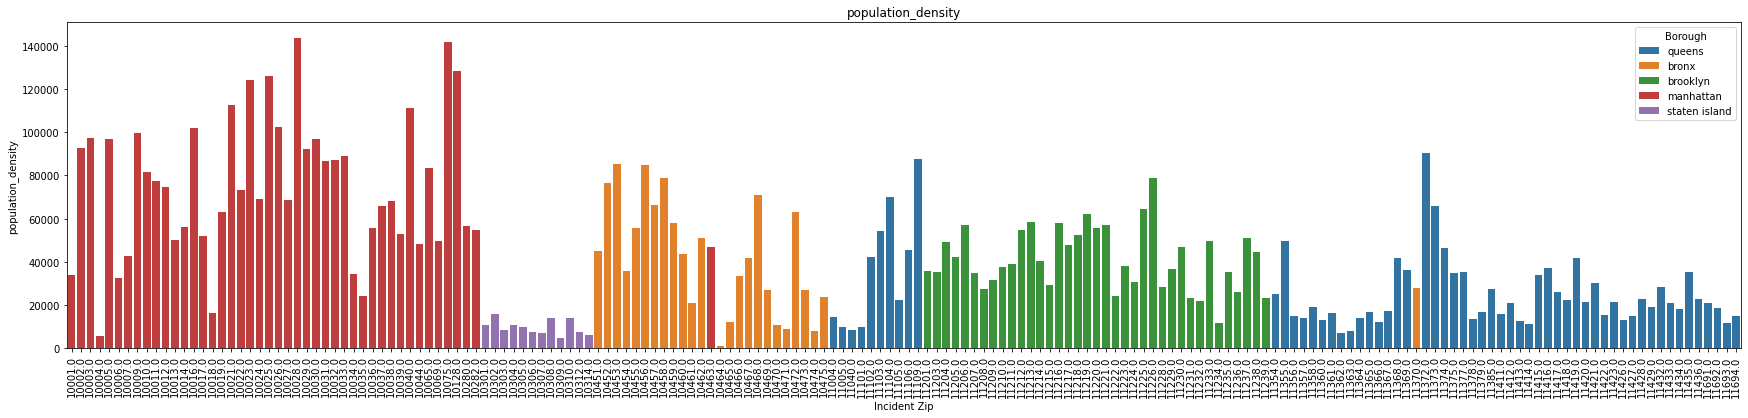

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough', 'Incident Zip']]

# drop any rows with missing values
demographics = demographics.dropna()

# create barplots for each demographic variable
for var in demographics.columns[:-2]:  # exclude the last two columns (Borough and Incident Zip)
    plt.figure(figsize=(30, 6))  # set the figure size
    sns.barplot(x='Incident Zip', y=var, data=demographics, estimator=np.median, dodge=False, hue='Borough')
    plt.xticks(rotation=90)  # rotate the x-axis labels
    plt.title(var)
    plt.show()

In [24]:
# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# group the data by borough and compute the median for each group
median_demographics_by_borough = demographics.groupby('Borough').median()

print(median_demographics_by_borough)

               housing_units  occupied_housing_units  median_home_value  \
Borough                                                                   
bronx                25866.0                 24796.0           388600.0   
brooklyn             29941.0                 28025.0           582300.0   
manhattan            22604.0                 20638.0           716100.0   
queens               15499.0                 14083.0           464500.0   
staten island        16261.0                 14719.0           437500.0   

               population  median_household_income  population_density  
Borough                                                                 
bronx             70496.0                  30288.0             55696.0  
brooklyn          78134.0                  43398.0             40566.0  
manhattan         50984.0                  66074.0             87199.0  
queens            39127.0                  55492.0             25886.0  
staten island     42193.0           

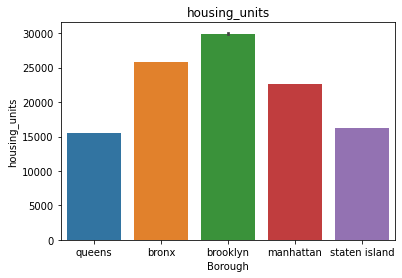

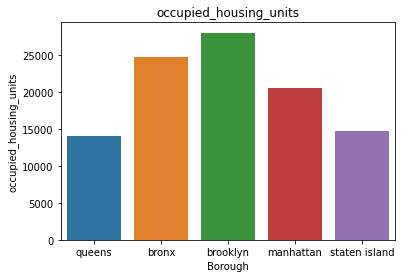

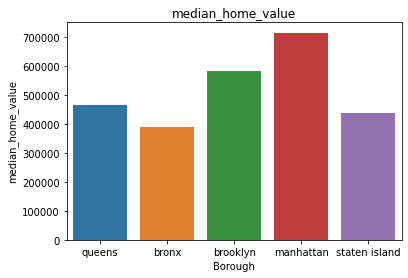

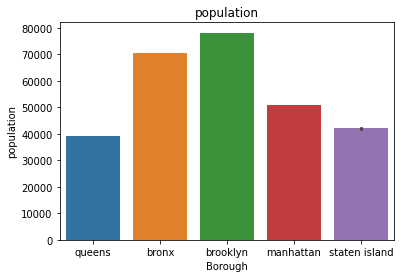

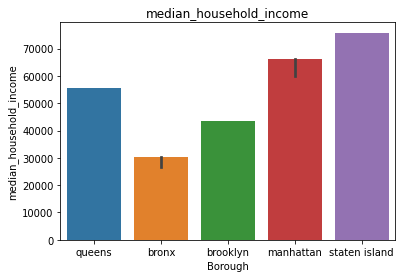

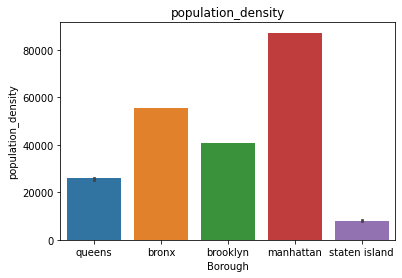

In [9]:
import numpy as np
import seaborn as sns

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create barplots for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    sns.barplot(x='Borough', y=var, data=demographics, estimator=np.median)
    plt.title(var)
    plt.show()

In [14]:
df['Incident Zip'].value_counts()

10467.0    4323
11226.0    3856
10468.0    3844
10458.0    3640
10457.0    3605
           ... 
11251.0       1
10271.0       1
10155.0       1
11005.0       1
10120.0       1
Name: Incident Zip, Length: 219, dtype: int64

In [20]:
# import seaborn as sns

# # select the demographic variables and borough columns
# demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough', 'Incident Zip']]

# # drop any rows with missing values
# demographics = demographics.dropna()

# # create a scatter plot matrix for the demographic variables and borough and zip code
# sns.pairplot(demographics, hue='Borough', vars=demographics.columns[:-2], diag_kind='hist', palette='bright')
# plt.show()

In [16]:
# # select the demographic variables and borough columns
# demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# # drop any rows with missing values
# demographics = demographics.dropna()

# # create scatterplots for pairs of demographic variables
# sns.pairplot(demographics, hue='Borough')
# plt.show()

In [17]:
# demo = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']]

# for i in demo:
#     print(df[i].describe()) 

In [18]:
# # List of demographic variables
# demographic_variables = ['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']

# # Calculate and print descriptive statistics for each demographic variable by borough
# for variable in demographic_variables:
#     grouped_demographic = df.groupby('Borough')[variable].describe()
#     print(f"Descriptive statistics for {variable}:\n")
#     print(grouped_demographic)
#     print("\n")

In [25]:
top20complaints = df['Complaint Type'].value_counts().nlargest(20).index.tolist()

df['top20complaint'] = 'other'

df = df.reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i, 'Complaint Type'] in top20complaints:
        df.loc[i, 'top20complaint'] = df.loc[i, 'Complaint Type']

In [33]:
import scipy.stats as stats

df = df.dropna()

# Create an empty dictionary to store the F-statistic and p-value for each demographic variable
anova_results = {}

# Loop over the demographic variables and compute the ANOVA for each variable
for var in ['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']:
    var_by_complaint = df.groupby('top20complaint')[var].apply(list)
    f_stat, p_value = stats.f_oneway(*var_by_complaint)
    anova_results[var] = {'F-statistic': f_stat, 'p-value': p_value}

# Print the ANOVA table
print('{:<25} {:<15} {:<15}'.format('Variable', 'F-statistic', 'p-value'))
print('-' * 55)
for var, results in anova_results.items():
    print('{:<25} {:<15.2f} {:<15.2e}'.format(var, results['F-statistic'], results['p-value']))

Variable                  F-statistic     p-value        
-------------------------------------------------------
housing_units             140.06          0.00e+00       
occupied_housing_units    151.78          0.00e+00       
median_home_value         384.20          0.00e+00       
population                205.82          0.00e+00       
median_household_income   603.96          0.00e+00       
population_density        903.31          0.00e+00       


In [38]:
from scipy.stats import kruskal

top20complaints = df['Complaint Type'].value_counts().nlargest(20).index.tolist()

df['top20complaint'] = 'other'

df = df.reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i, 'Complaint Type'] in top20complaints:
        df.loc[i, 'top20complaint'] = df.loc[i, 'Complaint Type']

df = df.dropna()

# Create an empty dictionary to store the H-statistic and p-value for each demographic variable
kruskal_results = {}

# Loop over the demographic variables and compute the Kruskal-Wallis H-test for each variable
for var in ['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']:
    var_by_complaint = df.groupby('top20complaint')[var].apply(list)
    h_stat, p_value = kruskal(*var_by_complaint)
    kruskal_results[var] = {'H-statistic': h_stat, 'p-value': p_value}

# Print the Kruskal-Wallis H-test table
print('{:<25} {:<15} {:<15}'.format('Variable', 'H-statistic', 'p-value'))
print('-' * 55)
for var, results in kruskal_results.items():
    print('{:<25} {:<15.2f} {:<15.2e}'.format(var, results['H-statistic'], results['p-value']))


Variable                  H-statistic     p-value        
-------------------------------------------------------
housing_units             2234.31         0.00e+00       
occupied_housing_units    2370.83         0.00e+00       
median_home_value         8740.10         0.00e+00       
population                3936.04         0.00e+00       
median_household_income   14547.32        0.00e+00       
population_density        17908.19        0.00e+00       


In [56]:
import scipy.stats as stats
import scikit_posthocs as sp
import pandas as pd

top20complaints = df['Complaint Type'].value_counts().nlargest(20).index.tolist()

df['top20complaint'] = 'other'

df = df.reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i, 'Complaint Type'] in top20complaints:
        df.loc[i, 'top20complaint'] = df.loc[i, 'Complaint Type']

df = df.dropna()

# Create an empty dictionary to store the H-statistic and p-value for each demographic variable
kruskal_results = {}

# Loop over the demographic variables and compute the Kruskal-Wallis H-test for each variable
for var in ['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']:
    var_by_complaint = df.groupby('top20complaint')[var].apply(list)
    h_stat, p_value = stats.kruskal(*var_by_complaint)
    kruskal_results[var] = {'H-statistic': h_stat, 'p-value': p_value}

# Print the Kruskal-Wallis H-test table
print('{:<25} {:<15} {:<15}'.format('Variable', 'H-statistic', 'p-value'))
print('-' * 55)
for var, results in kruskal_results.items():
    print('{:<25} {:<15.2f} {:<15.2e}'.format(var, results['H-statistic'], results['p-value']))

# Run post-hoc Dunn's tests for variables with significant differences
for var, results in kruskal_results.items():
    if results['p-value'] < 0.05:
        var_by_complaint_df = pd.DataFrame(var_by_complaint.tolist(), index=var_by_complaint.index)
        posthoc = sp.posthoc_dunn(var_by_complaint_df, p_adjust='holm')
        for complaint_type in top20complaints:
            group1 = var_by_complaint[complaint_type]
            for comparison_type in top20complaints:
                if comparison_type != complaint_type:
                    group2 = var_by_complaint[comparison_type]
                    p_value = posthoc.loc[complaint_type, comparison_type]
                    if p_value < 0.05:
                        print(f'{var}: {complaint_type} vs {comparison_type} - p-value: {p_value:.4f}')

KeyboardInterrupt: 

In [40]:
import statsmodels.stats.multicomp as mc

# Create an empty dictionary to store the Tukey HSD results for each demographic variable
tukey_results = {}

# Loop over the demographic variables and compute the Tukey HSD test for each variable
for var in ['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density']:
    var_by_complaint = df.groupby('top20complaint')[var].apply(list)
    tukey = mc.MultiComparison(df[var], df['top20complaint'])
    tukey_results[var] = tukey.tukeyhsd().summary()

# Print the Tukey HSD results
for var, results in tukey_results.items():
    print(var)
    print(results)

housing_units
                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
            group1                        group2              meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------------------------------------------
            abandoned vehicle              blocked driveway    4525.374    0.0   3984.2563  5066.4917   True
            abandoned vehicle             derelict vehicles   4100.8695    0.0   3391.7238  4810.0152   True
            abandoned vehicle               dirty condition   3574.8861    0.0   2836.8547  4312.9175   True
            abandoned vehicle                   door/window   4967.7844    0.0   4204.3226  5731.2462   True
            abandoned vehicle general construction/plumbing   4405.1504    0.0   3620.8806  5189.4202   True
            abandoned vehicle                heat/hot water   5662.9623    0.0   5167.7344  6158.1903   True
     

In [45]:
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create a list of unique boroughs
boroughs = demographics['Borough'].unique()

# conduct Kruskal-Wallis tests for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    print(f'{var}:')
    groups = [demographics[demographics['Borough'] == b][var] for b in boroughs]
    stat, pvalue = kruskal(*groups)
    print(f"Kruskal-Wallis H test statistic: {stat:.2f}, p-value: {pvalue:.4f}")
    
    # perform pairwise Mann-Whitney U tests with Bonferroni correction
    n_comparisons = len(boroughs) * (len(boroughs) - 1) // 2  # number of pairwise comparisons
    alpha = 0.05 / n_comparisons  # Bonferroni-corrected significance level
    pvalues = []
    for i in range(len(boroughs)):
        for j in range(i+1, len(boroughs)):
            group1 = groups[i]
            group2 = groups[j]
            u_stat, pvalue = mannwhitneyu(group1, group2, alternative='two-sided')
            pvalues.append(pvalue)
            print(f'{boroughs[i]} vs {boroughs[j]} - Mann-Whitney U test statistic: {u_stat:.2f}, p-value: {pvalue:.4f}')
    
    # apply Bonferroni correction to the p-values
    rejected, pvalues_corrected, _, _ = multipletests(pvalues, alpha=alpha, method='bonferroni')
    for i in range(len(pvalues_corrected)):
        if rejected[i]:
            print(f"Significant difference between {boroughs[i // (len(boroughs) - 1)]} and {boroughs[i % (len(boroughs) - 1)]} (corrected p-value: {pvalues_corrected[i]:.4f})")

housing_units:
Kruskal-Wallis H test statistic: 36219.08, p-value: 0.0000
queens vs bronx - Mann-Whitney U test statistic: 583432267.00, p-value: 0.0000
queens vs brooklyn - Mann-Whitney U test statistic: 582806705.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 563781877.00, p-value: 0.0000
queens vs staten island - Mann-Whitney U test statistic: 187555294.00, p-value: 0.7227
bronx vs brooklyn - Mann-Whitney U test statistic: 896597617.00, p-value: 0.0000
bronx vs manhattan - Mann-Whitney U test statistic: 935996073.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 290171474.00, p-value: 0.0000
brooklyn vs manhattan - Mann-Whitney U test statistic: 1557783663.00, p-value: 0.0000
brooklyn vs staten island - Mann-Whitney U test statistic: 436185634.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 225067340.00, p-value: 0.0000
Significant difference between queens and queens (corrected p-value: 0.0000)
Sign